<a href="https://colab.research.google.com/github/lovelyoyrmia/machine-learning-notebook/blob/main/books_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('books.csv', error_bad_lines=False)

In [12]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78E+12,eng,49,0,0,05-01-1977,Brown Son & Ferguson Ltd.
1,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999,Huntington House Publishers
2,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-2004,Cold Spring Press
3,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004,Harvard University Press
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA,NaN


In [8]:
df.shape

(11127, 13)

In [13]:
df.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
num_pages                 0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11123
dtype: int64

In [15]:
df = df.drop(['Unnamed: 12'], axis=1)

In [17]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78E+12,eng,49,0,0,05-01-1977
1,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999
2,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-2004
3,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk/Angel M.Y. Lin,0,805850848,9.78E+12,eng,241,0,0,08-05-2006,Routledge
11123,41044,Day and Night,Better Homes and Gardens,0,696018829,9.78E+12,eng,32,0,1,03-01-1989,Meredith Corporation
11124,42758,The Fantastic Vampire: Studies in the Children...,James Craig Holte,0,313309337,9.78E+12,eng,176,0,0,3/30/2002,Greenwood Press
11125,44705,The Leadership Challenge: Skills for Taking Ch...,Warren G. Bennis,0,088684049X,9.78E+12,eng,60,0,0,12-01-1985,AMR/Advanced Management Reports


In [18]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


In [26]:
top_ten = df[df['ratings_count'] > 1000000]

In [32]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [33]:
top_ten.sort_values(by='ratings_count', ascending=False)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
9953,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9.78E+12,eng,501,4597666,94265,09-06-2006,Little Brown and Company
1219,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,9.78E+12,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
7959,5107,The Catcher in the Rye,J.D. Salinger,3.8,316769177,9.78E+12,eng,277,2457092,43499,1/30/2001,Back Bay Books
6616,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9.78E+12,eng,736,2418736,21303,04-01-2006,Pocket Books
123,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
432,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,439064864,9.78E+12,eng,341,2293963,34692,06-02-1999,Arthur A. Levine Books / Scholastic Inc.
234,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
633,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,618346252,9.78E+12,eng,398,2128944,13670,09-05-2003,Houghton Mifflin Harcourt
5996,7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,452284244,9.78E+12,eng,122,2111750,29677,05-06-2003,NAL
110,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


In [36]:
book_aut = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')

In [38]:
book_aut

,title
authors,
P.G. Wodehouse,40
Stephen King,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


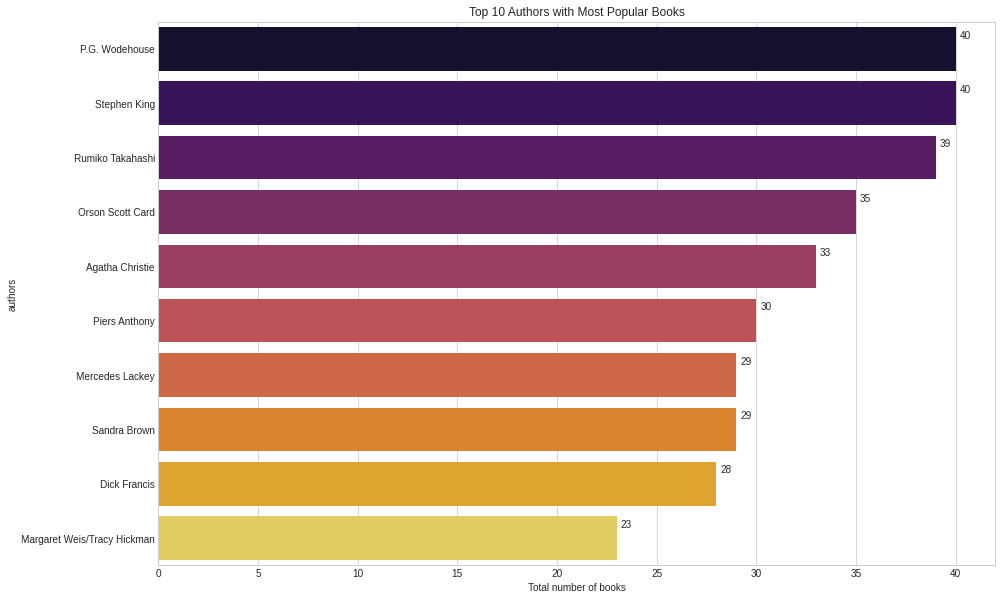

In [45]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(book_aut['title'], book_aut.index, palette='inferno')
ax.set_title('Top 10 Authors with Most Popular Books')
ax.set_xlabel('Total number of books')

total = []
for i in ax.patches:
  total.append(i.get_width())

totals=sum(total)

for i in ax.patches:
  ax.text(i.get_width() + .2, i.get_y() + .2, str(round(i.get_width())))

plt.show()

In [47]:
most_rated = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


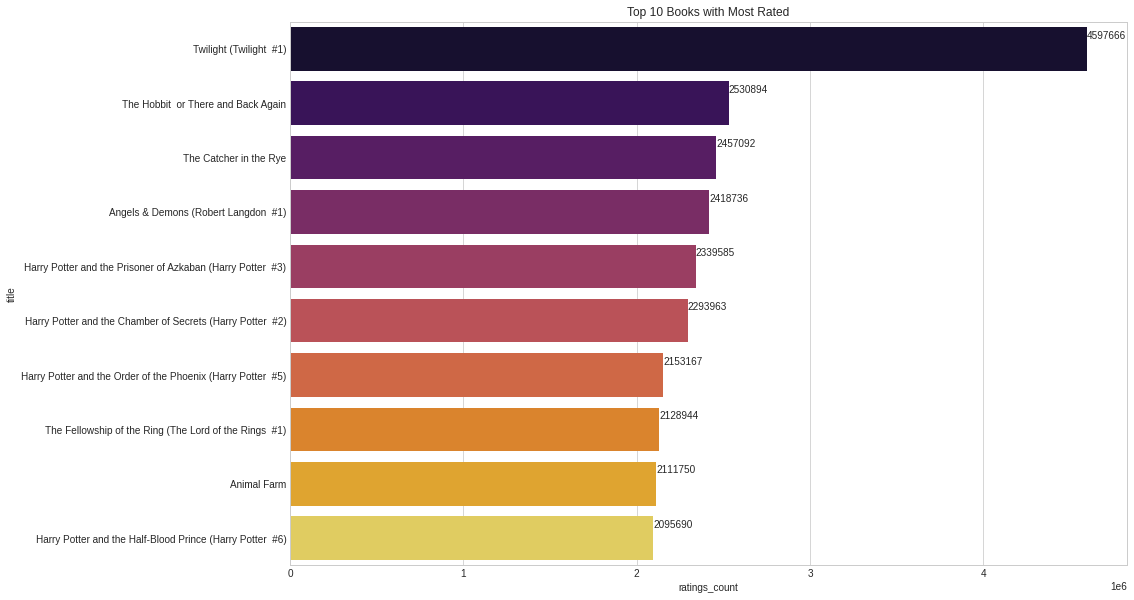

In [48]:
plt.figure(figsize=(15, 10))

ax = sns.barplot(most_rated['ratings_count'], most_rated.index, palette='inferno')
ax.set_title('Top 10 Books with Most Rated')

total = []
for i in ax.patches:
  total.append(i.get_width())

totals=sum(total)

for i in ax.patches:
  ax.text(i.get_width() + .2, i.get_y() + .2, str(round(i.get_width())))

plt.show()

In [52]:
df = df[df['average_rating'] != 'text']
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA,NaN
5,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,382960226X,9.78E+12,eng,83,1,0,09-01-2006,Schirmer Mosel,NaN
6,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,439271711,9.78E+12,eng,32,4,1,01-01-2002,Teaching Resources,NaN
7,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,738511676,9.78E+12,eng,128,2,0,3/17/2003,Arcadia Publishing,NaN
8,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,744002354,9.78E+12,eng,128,2,0,03-06-2003,BradyGames,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk/Angel M.Y. Lin,0.0,805850848,9.78E+12,eng,241,0,0,08-05-2006,Routledge,NaN
11123,41044,Day and Night,Better Homes and Gardens,0.0,696018829,9.78E+12,eng,32,0,1,03-01-1989,Meredith Corporation,NaN
11124,42758,The Fantastic Vampire: Studies in the Children...,James Craig Holte,0.0,313309337,9.78E+12,eng,176,0,0,3/30/2002,Greenwood Press,NaN
11125,44705,The Leadership Challenge: Skills for Taking Ch...,Warren G. Bennis,0.0,088684049X,9.78E+12,eng,60,0,0,12-01-1985,AMR/Advanced Management Reports,NaN
